# Gradient Descent

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [6]:
X,y = data['data'],data['target']

In [9]:
X_rm = X[:,5]

In [10]:
def price(x,k,b):
    return k * x + b

## loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

In [11]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [12]:
def partial_k(x,y,y_hat):
    n = len(y)
    
    grandient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        grandient += (y_i - y_hat_i)* x_i
    return -2/n *grandient

In [15]:
def partial_b(x,y,y_hat):
    n = len(y)
    
    grandient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        grandient += (y_i - y_hat_i)
    return -2/n *grandient

In [22]:
import random
try_times = 20000

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

min_loss = float('inf')
update_times = 0
learn_rate = 1e-04

for i in range(try_times):
    
    price_k_and_b = price(X_rm,current_k,current_b)
    current_loss = loss(y,price_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        #update_times += 1
        if i % 50 == 0:
            print('when times is :{},get best_k: {} best_b: {},and the loss is {}'.
              format(i,current_k,current_b,current_loss))
    k_grand = partial_k(X_rm,y,price_k_and_b)
    b_grand = partial_b(X_rm,y,price_k_and_b)
    
    current_k = current_k + (-1 * k_grand * learn_rate)
    current_b = current_b + (-1 * b_grand * learn_rate)
    
     




when times is :0,get best_k: -14.261018856504563 best_b: -60.909368624357406,and the loss is 30264.878462921126
when times is :50,get best_k: -12.590704415960628 best_b: -59.23905418381345,and the loss is 26164.20887989716
when times is :100,get best_k: -11.037822608865726 best_b: -57.68617237671853,and the loss is 22619.9135253482
when times is :150,get best_k: -9.594117251196035 best_b: -56.24246701904885,and the loss is 19556.506947128528
when times is :200,get best_k: -8.25191261576187 best_b: -54.900262383614674,and the loss is 16908.7449023457
when times is :250,get best_k: -7.004072622781014 best_b: -53.652422390633824,and the loss is 14620.234932931522
when times is :300,get best_k: -5.843962899587592 best_b: -52.4923126674404,and the loss is 12642.235443402944
when times is :350,get best_k: -4.765415507759799 best_b: -51.41376527561262,and the loss is 10932.617706926154
when times is :400,get best_k: -3.7626961501317657 best_b: -50.41104591798457,and the loss is 9454.968695375

when times is :3700,get best_k: 9.38897073826687 best_b: -37.259379029586036,and the loss is 44.25879244925017
when times is :3750,get best_k: 9.396555999356517 best_b: -37.251793768496405,and the loss is 44.17716289968296
when times is :3800,get best_k: 9.403607973321572 best_b: -37.24474179453136,and the loss is 44.1068007661228
when times is :3850,get best_k: 9.410164153289031 best_b: -37.23818561456393,and the loss is 44.046163856068155
when times is :3900,get best_k: 9.416259396405168 best_b: -37.232090371447825,and the loss is 43.99392015725367
when times is :3950,get best_k: 9.42192610916003 best_b: -37.226423658692944,and the loss is 43.948919255789264
when times is :4000,get best_k: 9.427194419682566 best_b: -37.22115534817039,and the loss is 43.910167636669485
when times is :4050,get best_k: 9.432092337922386 best_b: -37.21625742993059,and the loss is 43.876807339607346
when times is :4100,get best_k: 9.43664590456986 best_b: -37.21170386328313,and the loss is 43.848097514671

## loss
$$ loss = \frac{1}{n} \sum{|(y_i - \hat{y_i})|} $$

In [157]:
def loss_abs(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [169]:
def partial_k_abs(x,y,y_hat):
    n = len(y)
    
    grandient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i - y_hat_i >=  0:
            grandient += x_i
        else:
            grandient += -1 *  x_i
    return -1/n * grandient ## ??

In [170]:
def partial_b_abs(x,y,y_hat):
    n = len(y)
    
    grandient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i - y_hat_i >= 0: 
            grandient += -1
        else:
            grandient += 1
    return -1/n *grandient  ## ??

In [174]:
import random
try_times = 20000

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

min_loss = float('inf')
update_times = 0
learn_rate = 1e-03

for i in range(try_times):
    
    price_k_and_b = price(X_rm,current_k,current_b)
    current_loss = loss_abs(y,price_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        #update_times += 1
        if i % 50 == 0:
            print('when times is :{},get best_k: {} best_b: {},and the loss is {}'.
              format(i,current_k,current_b,current_loss))
    k_grand = partial_k_abs(X_rm,y,price_k_and_b)
    b_grand = partial_b_abs(X_rm,y,price_k_and_b)
    
    
#     price_by_random_k_and_b  = [price(r,current_k,current_b) for r in X_rm]
#     #plt.scatter(X_rm,y)
#     plt.scatter(X_rm,price_by_random_k_and_b)
    
    current_k = current_k + (-1 * k_grand * learn_rate)
    current_b = current_b + (-1 * b_grand * learn_rate)
    
   

when times is :0,get best_k: 25.43410259964179 best_b: -69.83100427023778,and the loss is 67.50694523421228
when times is :50,get best_k: 25.120574635214894 best_b: -69.78120189869621,and the loss is 65.5905550688821
when times is :100,get best_k: 24.807046670787997 best_b: -69.73139952715464,and the loss is 63.67416490355205
when times is :150,get best_k: 24.4935187063611 best_b: -69.68159715561306,and the loss is 61.757774738221876
when times is :200,get best_k: 24.179990741934205 best_b: -69.63179478407149,and the loss is 59.84138457289176
when times is :250,get best_k: 23.86739676960218 best_b: -69.58219794612693,and the loss is 57.93635258511032
when times is :300,get best_k: 23.555614457349208 best_b: -69.53279083150268,and the loss is 56.04100963994431
when times is :350,get best_k: 23.243832145096235 best_b: -69.48338371687844,and the loss is 54.14566669477822
when times is :400,get best_k: 22.932049832843262 best_b: -69.43397660225419,and the loss is 52.25032374961223
when tim

In [165]:
import matplotlib.pyplot as plt

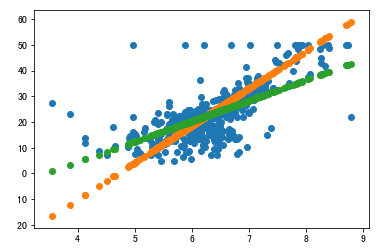

In [176]:
k = 14.469806888178967
b =  -68.12832442834235
k1 = 8.005456511475284
b1 = -27.653936021116806
price_by_random_k_and_b  = [price(r,k,b) for r in X_rm]
price_by_random_k_and_b1 = [price(r,k1,b1) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_by_random_k_and_b)
plt.scatter(X_rm,price_by_random_k_and_b1)

# Dynamic Programming

In [239]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 32,34]

In [182]:
from collections import defaultdict

In [248]:
price_clip = defaultdict(int)
for i,p in enumerate(original_price):
    price_clip[i+1] = p

In [249]:
price_clip[12]

34

In [54]:
def r(n):
    return max([price_clip[n]] + [r(i)+r(n-i) for i in range(1,n)])

In [57]:
r(15)

45

In [240]:
call_time = defaultdict(int)
def get_call_times(f):
    result = f()
    print('function:{} called once!'.format(f.__name__))
    call_time[f.__name__] +=1
    return result

In [241]:
def some_function_1():print('I am function1')

In [242]:
get_call_times(some_function_1)

I am function1
function:some_function_1 called once!


In [243]:
call_time

defaultdict(int, {'some_function_1': 1})

# 装饰器

In [179]:
from functools import wraps

In [314]:
called_time_with_arg = {}

In [315]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    #@wraps(f) ##保持原来函数的特性
    def wrap(n):
        """print('i am count!')"""
        result = f(n)
        called_time_with_arg[(f.__name__,n)] += 1
        return result
    return wrap

In [288]:
@get_call_time  ##等价于add_count = get_call_time(add_count)
def add_count(n):
    """sdf"""
    return n+20

In [289]:
add_count

<function __main__.get_call_time.<locals>.wrap(n)>

In [220]:
help(add_count)

Help on function add_count in module __main__:

add_count(n)
    sdf



In [95]:
called_time_with_arg

defaultdict(int, {('add_count', 10): 1})

In [87]:
add_count = get_call_time(add_count)

In [88]:
add_count(10)

i am count!


30

In [138]:
@get_call_time
def r(n):
    return max([price_clip[n]] + [r(i)+r(n-i) for i in range(1,n)])

In [139]:
r(15)

45

In [142]:
called_time_with_arg

{}

In [299]:
solution = {}
memo.already_computed = {}

In [317]:
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap

In [318]:
@get_call_time #有错误
@memo
def r_n(n):
    max_price,max_split = max(
    [(price_clip[n],0)] + [(r_n(i) + r_n(n-i),i)for i in range(1,n)],key=lambda x:x[0]
    )
    solution[n] = (n - max_split,max_split)
    return max_price

In [319]:
r_n

<function __main__.get_call_time.<locals>.wrap(n)>

In [323]:
r_n(30)

90

In [324]:
called_time_with_arg

defaultdict(int,
            {('r_n', 1): 58,
             ('r_n', 2): 56,
             ('r_n', 3): 54,
             ('r_n', 4): 52,
             ('r_n', 5): 50,
             ('r_n', 6): 48,
             ('r_n', 7): 46,
             ('r_n', 8): 44,
             ('r_n', 9): 42,
             ('r_n', 10): 40,
             ('r_n', 11): 38,
             ('r_n', 12): 36,
             ('r_n', 13): 34,
             ('r_n', 14): 32,
             ('r_n', 15): 31,
             ('r_n', 16): 28,
             ('r_n', 17): 26,
             ('r_n', 18): 24,
             ('r_n', 19): 22,
             ('r_n', 20): 20,
             ('r_n', 21): 18,
             ('r_n', 22): 16,
             ('r_n', 23): 14,
             ('r_n', 24): 12,
             ('r_n', 25): 10,
             ('r_n', 26): 8,
             ('r_n', 27): 6,
             ('r_n', 28): 4,
             ('r_n', 29): 2,
             ('r_n', 30): 1})

In [325]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (11, 6),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (11, 10),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (21, 6),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10)}

In [326]:
def parse_solution(n):
    left_split,right_split = solution[n]
    if right_split == 0:
        return [left_split]
    return parse_solution(left_split) + parse_solution(right_split)

In [327]:
r_n(165)

493

In [328]:
parse_solution(165)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 2]